# Lab 11: Multi-class classification in tensorflow

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget

from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lib.lab_utils_multiclass_TF import *

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## Create 4-class dataset

/Users/chrisbrickey/Development/lossless2/lib/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


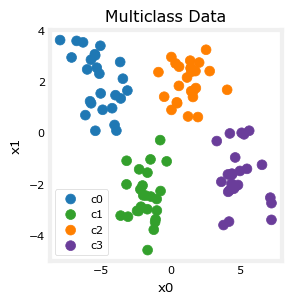

In [10]:
# inputs
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0

# use Scikit-Learn make_blobs function to make a training data set with 4 categories as shown in the plot below
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

# plot data
plt_mc(X_train,y_train,classes, centers, std=std)

In [11]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")

# show how classes are represented
print(f"class representation {y_train[:10]}")

# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


In [15]:
# print first training example
print(X_train[0])
print(y_train[0])

# print last training example
print(X_train[-1])
print(y_train[-1])

[ 4.33 -1.99]
3
[-4.01  0.3 ]
0


## Create two-layer neural network

Unlike the binary classification networks, this network has four outputs, one for each class. 

Given an input example, the output with the highest value (probability of being associated with that class) is the predicted class of the input.

In [21]:
# Define model

tf.random.set_seed(1234)  # applied to achieve consistent results

model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")  # final layer is linear (preferred approach)
    ]
)

In [19]:
# Compile
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

In [20]:
# Train
model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7810  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4527
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1727
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9289
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7199
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5440
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3985
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2791
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1813
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1003
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0320
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9735
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9222
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8768
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8363
Epoch 16/200
4/4 ━━━━━━━━━━━━━━━

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 243us/step


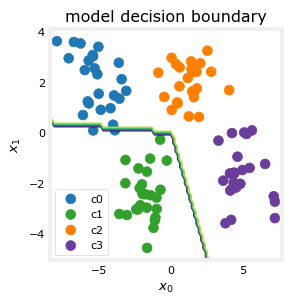

In [24]:
## Plot the results
# The decision boundaries show how the model has partitioned the input space. This very simple model has had no trouble classifying the training data. 

plt_cat_mc(X_train, y_train, model, classes)

## Examine the characteristics of each unit of each layer of the network

### Layer 1 (first layer)

* There are two plots for layer 1 because there are two units: 0 and 1. 
* The inputs are (𝑥0,𝑥1) on the axis. 
* The output of the unit is represented by the color of the background. This is indicated by the color bar on the right of each graph.
* The intensity of the background color indicates the highest values.

Notice that since these units are using a ReLu, the outputs do not necessarily fall between 0 and 1 and in this case are greater than 20 at their peaks. The contour lines in this graph show the transition point between the output being zero and non-zero. Recall the graph for a ReLu (flat on the axis when x < 0 and linear when x > 0). The contour line in the graphs below is the inflection point in the ReLu.

You can see in the graph "Layer 1 Unit 0" that unit 0 has spearated classes 0 and 1 from classes 2 and 3. Points to the left of the line (classes 0 and 1) will output zero, while points to the right will output a value greater than zero.

You can see in the graph "Layer 1 Unit 1" that unit 1 has separated classes 0 and 2 from classes 1 and 3. Points above the line (classes 0 and 2) will output a zero, while points below will output a value greater than zero.

In [25]:
# Isolate the trained parameters from the first layer (L1)
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

/Users/chrisbrickey/Development/lossless2/lib/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/chrisbrickey/Development/lossless2/lib/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


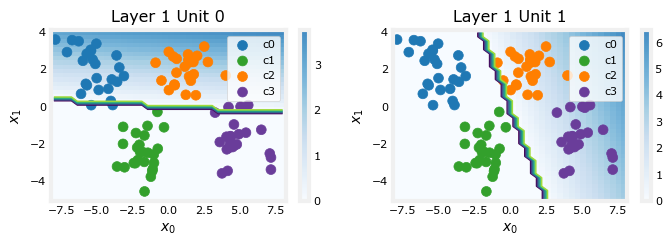

In [35]:
# Plot the first layer (L1); It has two units Unit 0 and Unit 1.
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

### Layer 2 (output layer)
**NB: The plotting of layer 2 in this notebook is slightly different from the class materials.**

* There are four plots for layer 2 because there are four units: 0, 1, 2, 3.
* The dots in these graphs are the training examples translated by the first layer. One way to think of this is the first layer has created a new set of features for evaluation by the 2nd layer. The axes in these plots are the outputs of the previous layer.
 
The intensity of the background color indicates the highest values:
* Unit 0 will produce its maximum value for values near (0,0), where class 0 (blue) has been mapped.
* Unit 1 produces its highest values in the upper left corner selecting class 1 (green).
* Unit 2 targets the lower right corner where class 2 (orange) resides.
* Unit 3 produces its highest values in the upper right selecting our final class (purple).

/Users/chrisbrickey/Development/lossless2/lib/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/chrisbrickey/Development/lossless2/lib/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/chrisbrickey/Development/lossless2/lib/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/Users/chrisbrickey/Development/lossless2/lib/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


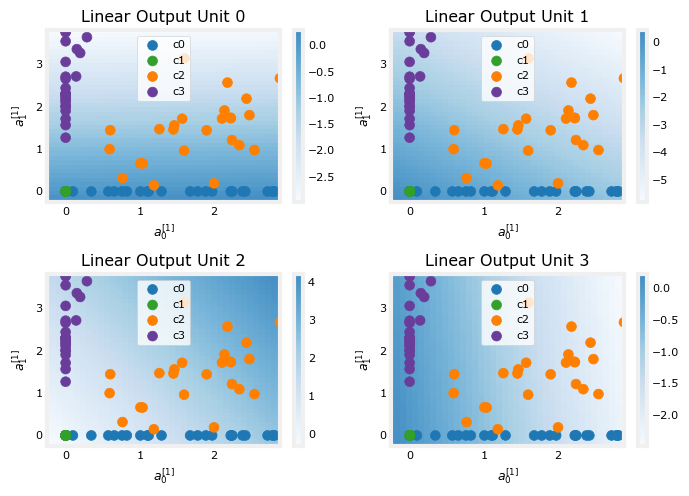

In [34]:
# Calculate the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

# Isolate the trained parameters from the output layer (L2)
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()

# Plot the second layer (L2); It has four units: 0, 1, 2, 3
plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))